https://www.kernix.com/blog/image-classification-with-a-pre-trained-deep-neural-network_p11

In [1]:
reset -fs

In [2]:
import os
import re
import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

//anaconda/envs/wellio/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def plot_confusion_matrix(y_true, y_pred):
    cm_array = confusion_matrix(y_true, y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks, pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

In [4]:
X = pickle.load(open('/Users/carles/Desktop/data/tutorial/X'))

In [5]:
y = pickle.load(open('/Users/carles/Desktop/data/tutorial/y'))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
clf = LinearSVC(C=1.0, loss='squared_hinge', penalty='l2', multi_class='ovr')

In [8]:
clf.fit(X_train, y_train.ravel())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
y_clf_pred = clf.predict(X_test)

In [10]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_clf_pred)*100))

Accuracy: 49.5%


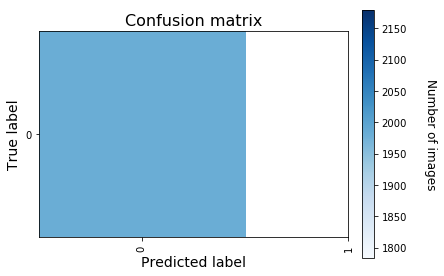

In [11]:
plot_confusion_matrix(y_test, y_clf_pred)

In [12]:
lr = LogisticRegression()

In [13]:
lr.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_lr_pred = lr.predict(X_test)

In [15]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_lr_pred)*100))

Accuracy: 49.5%


In [16]:
rf = RandomForestClassifier()

In [17]:
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
y_rf_pred = rf.predict(X_test)

In [19]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_rf_pred)*100))

Accuracy: 49.5%


In [20]:
nb_1 = MultinomialNB()

In [21]:
nb_1.fit(X_train, y_train.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_nb_pred = nb_1.predict(X_test)

In [23]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_nb_pred)*100))

Accuracy: 49.5%


In [24]:
nb_2 = BernoulliNB()

In [25]:
nb_2.fit(X_train, y_train.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [26]:
y_b_pred = nb_2.predict(X_test)

In [27]:
print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test, y_b_pred)*100))

Accuracy: 50.5%


### Food images from `Imagenet`:

http://image-net.org/explore?wnid=n00021265#

only 1,272 pictures.

### Extracting most important features from RandomForest model.

In [28]:
feature_importances_indices_rf = np.argsort(rf.feature_importances_)

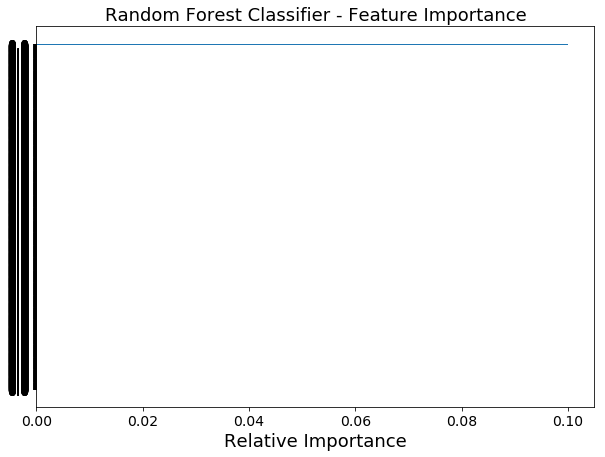

In [29]:
figure = plt.figure(figsize=(10,7))
plt.barh(np.arange(X.shape[1]), rf.feature_importances_[feature_importances_indices_rf], align="center")
plt.yticks(np.arange(X.shape[1]), X[:,-1][feature_importances_indices_rf], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Relative Importance", fontsize=18)
plt.title("Random Forest Classifier - Feature Importance", fontsize=18);

>No feature is important.